In [57]:
#%% md
# Data analysis
#%% md

#### Importing libaries

In [58]:
import numpy as np
import pandas as pd #import panda library
from matplotlib import pyplot as plt #import matplotlib library
import seaborn as sns #import seaborn library

plt.style.use('seaborn-white') #setting the plt.style use

In [59]:
#%% md

## Load and read the data csv.file

In [60]:
#%%

df = pd.read_csv('/users/jorge/desktop/data.csv')
df.head() #data loaded as a dataframe / showing the first 5 rows as a header

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [61]:
#%% md

## Explore the data, and perform proper visualization

In [62]:
#%%

print('data shape:', df.shape) #as we can see we have 244 rows x 6 columns
print('data dim:', df.ndim) #checking dimension
print(type(df)) #veryfing data type

data shape: (244, 6)
data dim: 2
<class 'pandas.core.frame.DataFrame'>


In [63]:
#%% md

### Data information

In [64]:
#%%

df.info() #concise summary of the dataframe such as:
          #index, data type, columns and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [65]:
#%%

df.isnull().sum() #Checking for any "null" values

total_bill    0
tip           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [66]:
#%%

df.describe() #Summary of the dataset in detail

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [67]:
#%% md

### Co-relations

In [68]:
#%%

df.corr() #find the pairwise co-relations of the columns in the dataframe

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [69]:
#%% md

# summarise

In [70]:
#%% md

#### Total bill

In [71]:
#%%

sum = df['total_bill'].sum()
print('total_bill summary:', sum) #total summary
print('total bill (min) value :', df['total_bill'].min()) #min value
print('total bill mean :', df["total_bill"].mean()) #printing mean value of total_bill
print('total bill median :', df['total_bill'].quantile(q=0.5)) #median value
print('total bill (max) value :', df['total_bill'].max()) #max value

total_bill summary: 4827.77
total bill (min) value : 3.07
total bill mean : 19.785942622950824
total bill median : 17.795
total bill (max) value : 50.81


In [72]:
#%% md

#### Tip

In [73]:
#%%

sum1 = df['tip'].sum()
print('tip summary:', sum1) #total summary
print('tip (min) value :', df['tip'].min()) #min value
print('tip mean :', df["tip"].mean()) #printing mean value of tip
print('tip median :', df['tip'].quantile(q=0.5)) #median value
print('tip (max) value :', df['tip'].max()) #max value

tip summary: 731.5799999999999
tip (min) value : 1.0
tip mean : 2.9982786885245902
tip median : 2.9
tip (max) value : 10.0


In [74]:
#%% md

#### Size

In [75]:
#%%

sum2 = df['size'].sum()
print('size summary:', sum2) #total summary
print('size (min) value :', df['size'].min()) #min value
print('size mean :', df['size'].mean()) #mean value
print('size median :', df['size'].quantile(q=0.5)) #median value
print('size (max) value :', df['size'].max()) #max value

size summary: 627
size (min) value : 1
size mean : 2.569672131147541
size median : 2.0
size (max) value : 6


In [76]:
#%% md

#### smoker

In [77]:
#%%

y_smoke = (df['smoker']).value_counts()['Yes']
n_smoke = (df['smoker']).value_counts()['No']
print('yes:', y_smoke) #value count of people smoking
print('no :', n_smoke) #value count of people not smoking

yes: 93
no : 151


In [78]:
#%%

sns.set_style('whitegrid') #seaborn whitegrid to see the results more exact
sns.set_context('talk') #seaborn setting for a better visualization

In [79]:
#%% md

### Pie chart / smoker vs non-smoker

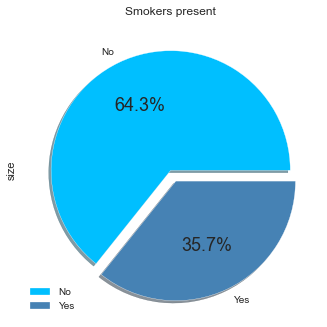

In [80]:
#%%

plt.style.use('seaborn')
df.groupby(['smoker']).sum().plot(kind= 'pie', y= 'size',
                                  shadow = True,
                                  explode = (0, 0.1),
                                  colors = ['deepskyblue', 'steelblue'],
                                  autopct='%1.1f%%').set_title\
    ('Smokers present');
#pie chart visualizing: smokers vs non-smokers
#counted and sorted by size

In [81]:
#%% md

### Countplot / Daily table servings

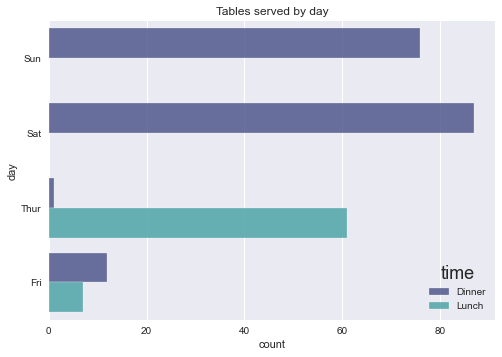

In [82]:
#%%

sns.countplot(y='day', hue='time', palette=('mako'),
            saturation=0.8,
            data=df,
              alpha=0.8)
plt.title("Tables served by day");
#catplot visualizing: tables served by lunch & dinner
#counted and sorted by the: different days from friday-sunday

In [83]:
#%% md

### Catplot / Table servings by size

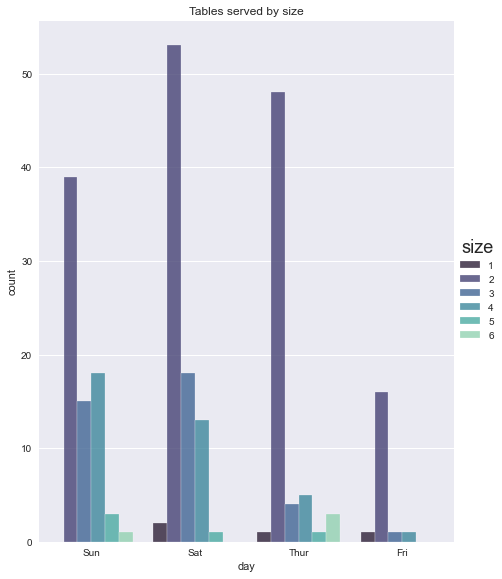

In [84]:
#%%

sns.catplot(x='day', hue='size', palette=('mako'),
            saturation=0.8,
            data=df, kind='count',
            height=8, aspect=.8,
            alpha=0.8)
plt.title("Tables served by size");
#Catplot visualizing: tables served by size
#counted and sorted by the: different days from friday-sunday

In [85]:
#%% md

## Perform data cleaning or transformation

In [86]:
#%% md

# Interesting subject:

In [87]:
#%% md

### We want to add a few new variables to show a interesting subject in the dataframe:

In [88]:
#%%

df['person_bill']=df['total_bill']/df['size'] # what is the total_bill by person?
df['person_tip']=df['tip']/df['size'] #what is the the tip by person?
df.head() #shows the top 5 rows in the set and our new values

,total_bill,tip,smoker,day,time,size,person_bill,person_tip
0,16.99,1.01,No,Sun,Dinner,2,8.495000,0.505000
1,10.34,1.66,No,Sun,Dinner,3,3.446667,0.553333
2,21.01,3.50,No,Sun,Dinner,3,7.003333,1.166667
3,23.68,3.31,No,Sun,Dinner,2,11.840000,1.655000
4,24.59,3.61,No,Sun,Dinner,4,6.147500,0.902500


In [89]:
#%% md

### Finding new co-relations

In [90]:
#%%

df.corr()

,total_bill,tip,size,person_bill,person_tip
total_bill,1.000000,0.675734,0.598315,0.647497,0.240988
tip,0.675734,1.000000,0.489299,0.347393,0.677494
size,0.598315,0.489299,1.000000,-0.175412,-0.253618
person_bill,0.647497,0.347393,-0.175412,1.000000,0.537820
person_tip,0.240988,0.677494,-0.253618,0.537820,1.000000


In [91]:
#%% md

#### Tip value by person

In [92]:
#%%

print('tip (min) value :', df['person_tip'].min()) #printing new (min) value of tip
print('tip mean :', df["person_tip"].mean()) #printing new mean value of tip
print('tip (max) value :', df['person_tip'].max()) #printing new (max) value of tip

tip (min) value : 0.4
tip mean : 1.2127616120218587
tip (max) value : 3.3333333333333335


In [93]:
#%% md

#### Bill value by person

In [94]:
#%%

print('total bill (min) value :', df['person_bill'].min()) #printing new (min) value of total_bill
print('total bill mean :', df["person_bill"].mean()) #printing new mean value of total_bill
print('total bill (max) value :', df['person_bill'].max()) #printing new (max) value of total_bill

total bill (min) value : 2.875
total bill mean : 7.88822950819673
total bill (max) value : 20.275


In [95]:
#%% md

## Conclusion by visualization or analysis

In [96]:
#%% md

### Average tip by size and smoker

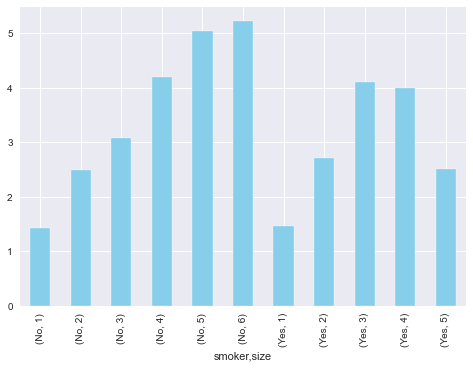

In [97]:
#%%

df.groupby(['smoker', 'size'])['tip'].mean().plot.bar(color='skyblue')
plt.show() #we can conclude that non-smokers size have a higher average tip rate

In [98]:
#%% md

### Tip by person which is less or equal to 1

In [99]:
#%%

df['person_tip'].apply(lambda x: 'true' if x >= 1 else 'false')
#lambda boolean / condition function checking if it meets  the set criteria: 'true' if it does, else 'false'

0      false
1      false
2       true
3       true
4      false
       ...  
239     true
240     true
241     true
242    false
243     true
Name: person_tip, Length: 244, dtype: object

In [100]:
#%% md

### Differential total bill & bill by person

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


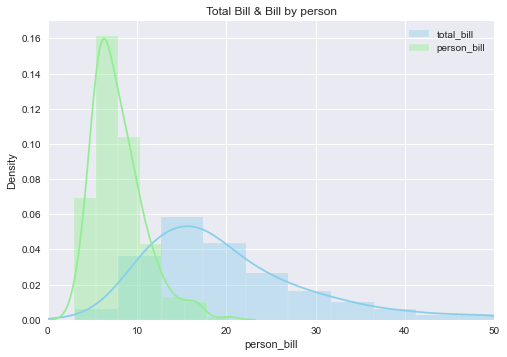

In [101]:
#%%

sns.distplot(df['total_bill'], color = 'skyblue', label="total_bill", bins = 10) #
sns.distplot(df['person_bill'], color= 'lightgreen', label="person_bill", bins = 7)
#Distplots visualizing: total bill differential by person bill
plt.title("Total Bill & Bill by person"); #setting a plt.title
plt.legend() #added a label to each axes of the plot
plt.xlim(0, 50) #setting the x-axes (min)-(max) value
plt.ylim(0, 0.17); #setting the y-axes (min)-(max) value

In [102]:
#%% md

### Scatterplot total bill and tip sorted by time

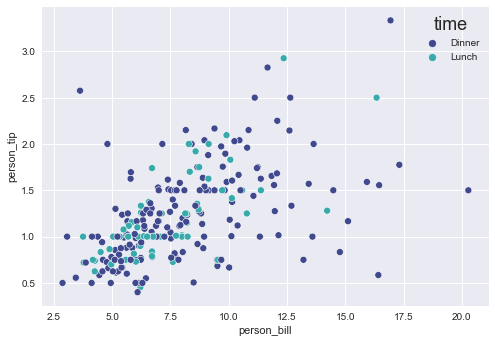

In [103]:
#%%

sns.scatterplot(data = df, x='person_bill', y='person_tip', hue='time', palette=('mako'));
#scatterplot visualizing: person bill differential by person tip
#we can conclude that the higher  bill = higher tip

In [104]:
#%% md

### Differential between tip and tip by person

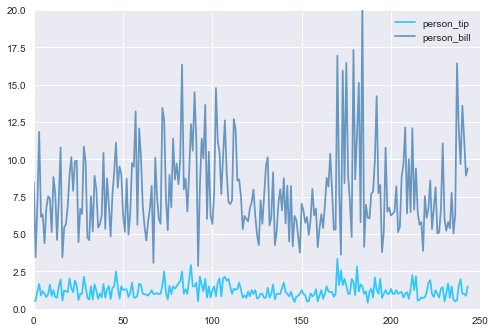

In [105]:
#%%

tip = df.loc[:,['person_tip', 'person_bill']]
tip.plot(color = ['deepskyblue', 'steelblue'], alpha=0.8)
plt.xlim(0, 250) #setting the x-axes (min)-(max) value
plt.ylim(0, 20)
plt.show();

In [106]:
#%% md

#### Filtering

In [107]:
#%%

df.loc[(df.total_bill>25) & (df.person_tip > 2)]
#filtering out showing us who meets the conditions with total bill larger than 25 and also have a tip rate more than 2

,total_bill,tip,smoker,day,time,size,person_bill,person_tip
73,25.28,5.00,Yes,Sat,Dinner,2,12.640000,2.500000
83,32.68,5.00,Yes,Thur,Lunch,2,16.340000,2.500000
107,25.21,4.29,Yes,Sat,Dinner,2,12.605000,2.145000
170,50.81,10.00,Yes,Sat,Dinner,3,16.936667,3.333333
212,48.33,9.00,No,Sat,Dinner,4,12.082500,2.250000
214,28.17,6.50,Yes,Sat,Dinner,3,9.390000,2.166667


In [108]:
#%% md

#### Tip differential subplot

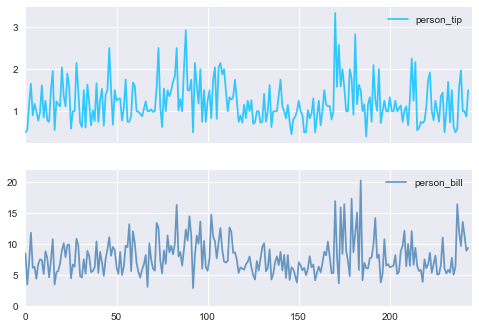

In [109]:
#%%

tip.plot(subplots = True, color = ['deepskyblue', 'steelblue'], alpha=0.8)
plt.xlim(0, 245) #setting the x-axes (min)-(max) value
plt.ylim(0, 22)
plt.show();

In [110]:
#%% md

### Differential between tip and size

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


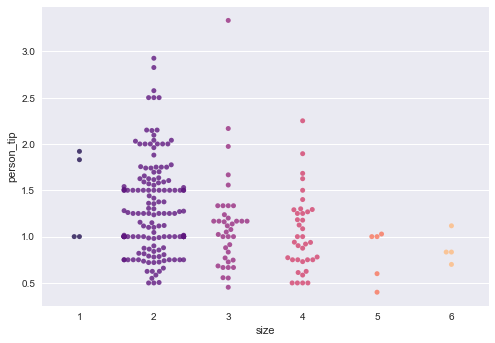

In [111]:
#%%

tip2 = sns.swarmplot(x="size", y="person_tip",
                     data=df,
                     palette='magma',dodge=True, alpha=0.8);
plt.show()
#we can easily see the comparison between size and tip
